# Libraris Loading

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

    
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Feature Selection
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

#Multicolinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Regression statsmodel
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#SVM
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_validate

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#XGboost
from xgboost import XGBRegressor

#Winsorize
import scipy.stats

import time
import itertools

# Data Loading

In [0]:
df = pd.read_csv('onion_columns_all_merge_final.csv')
df=df.iloc[:,3:]
df.head(5)

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


# Data Scaling 

In [0]:
df_columns = df.columns.tolist()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df_columns)
df_scaled.head(5)

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.688295,0.492168,0.604644,0.832987,0.815820,0.709517,0.705387,0.742401,0.805503,0.636747,...,0.363636,0.528026,0.163097,0.348192,0.237995,0.207970,0.000000,0.216984,0.029470,0.536199
1,0.720809,0.669318,0.887041,1.000000,0.762931,0.729696,0.691146,0.504227,0.835600,0.564683,...,0.454545,0.528026,0.036766,0.159791,0.120797,0.111806,0.010678,0.340974,0.114290,0.338864
2,0.566723,0.655994,0.683401,0.901101,0.695938,0.994535,0.641085,0.734363,0.531841,0.690984,...,0.363636,0.012660,0.224336,0.199348,0.104012,0.210779,0.088825,0.163249,0.052816,0.035089
3,0.844077,0.697481,0.852212,0.771031,0.716453,0.618715,0.540747,0.715115,0.707445,0.917795,...,0.545455,0.035354,0.200719,0.088195,0.129956,0.206667,0.034499,0.123991,0.107025,0.023216
4,0.703562,0.749566,0.895199,0.946894,0.832167,0.693753,0.708408,0.873756,0.810357,0.873040,...,0.454545,0.119747,0.000000,0.115389,0.232253,0.206667,0.059141,0.216984,0.131710,0.021430


# IV(변수)와 DV(생산량)로 나누기

In [0]:
X_scaled = df_scaled.iloc[:,1:]
y_scaled = df_scaled.iloc[:,0]
print("X_scaled:",X_scaled.shape)
print("y_scaled:",y_scaled.shape)

X_scaled: (144, 189)
y_scaled: (144,)


# Multicolinearity 

## 다중공선성 가능성 확인 
## 1.Correlation 

In [0]:
corr = pd.DataFrame(X_scaled.corr())
corr[(corr > 0.9) & (corr <1)].stack().reset_index()

,level_0,level_1,0
0,평균기온 7월,최고기온 7월,0.936627
1,평균기온 7월,최저기온 7월,0.930684
2,평균기온 8월,최고기온 8월,0.957738
3,평균기온 8월,최저기온 8월,0.945941
4,평균기온 10월,최저기온 10월,0.939690
...,...,...,...
195,수소이온농도 pH,비소 As,0.946884
196,수소이온농도 pH,아연 Zn,0.961013
197,아연 Zn,구리 Cu,0.936545
198,아연 Zn,니켈 Ni,0.913759


## 다중공선성 확인 
## 2.VIF 

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif.sort_values('VIF Factor')

C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,inf,평균기온 7월
122,inf,9월 일산화탄소
123,inf,10월 일산화탄소
124,inf,11월 일산화탄소
125,inf,12월 일산화탄소
...,...,...
97,NaN,적설량 8월
98,NaN,적설량 9월
99,NaN,적설량 10월
106,NaN,적설량 5월


# Feature Reduction - Stepwise

## 전진선택법(step=1)

In [0]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].idxmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

## 후진선택법(step=1)

In [0]:
def backward(X,y,predictors):
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].idxmin()]
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

## Subset

In [0]:
def processSubset(X,y, feature_set):
            X = sm.add_constant(X)
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}

## 단계선택법

In [0]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    return (Stepmodels['model'][len(Stepmodels['model'])])

## Running Stepwise 

In [0]:
Stepwise_best_model=Stepwise_model(X_scaled,y_scaled)

Processed  189 models on 1 predictors in
Selected predictors: ['최고기온 2월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC8F288>
forward
Processed  1 models on 0 predictors in
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC8F548>
Processed  188 models on 2 predictors in
Selected predictors: ['최고기온 2월', '아연 Zn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCEAA08>
forward
Processed  2 models on 1 predictors in
Selected predictors: ['최고기온 2월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCD5208>
Processed  187 models on 3 predictors in
Selected predictors: ['최고기온 2월', '아연 Zn', '2월 오존', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCC1348>
forward
Processed  3 models on 2 predictors in
Selected predictors:

Processed  15 models on 14 predictors in
Selected predictors: ['최고기온 2월', '아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '강수량 12월', '운량 11월', '강수량 6월', '5월 일산화탄소', '일조시간 1월', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC49308>
Processed  174 models on 16 predictors in
Selected predictors: ['최고기온 2월', '아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '강수량 12월', '운량 11월', '강수량 6월', '5월 일산화탄소', '4월 일산화탄소', '일조시간 1월', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFD14248>
forward
Processed  16 models on 15 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '강수량 12월', '운량 11월', '강수량 6월', '5월 일산화탄소', '4월 일산화탄소', '일조시간 1월', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC6DFC8

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFD1AD08>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC9B288>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCDF208>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC9FF48>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCCD0E48>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCD1F448>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCCBDB88>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFD42108>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFD42888>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCB0B448>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCF5C08>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020AC6B9B148>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCD3208>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020AD0D39C88>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCF5A08>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCE0508>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFBC4508>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCD0CDC8>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCD19748>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC9C4C8>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCD14048>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020AD1D405C8>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCD0CC88>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020AD1D42508>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC73E08>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCE9408>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCE9D48>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCE9D08>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCCBD808>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020AD0D32648>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFCECB88>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACFC9CE48>
backward
Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄

Processed  168 models on 22 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', '적설량 5월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020AD0D50588>
forward
Processed  22 models on 21 predictors in
Selected predictors: ['아연 Zn', '2월 오존', '일조시간 9월', '강수량 1월', '운량 11월', '강수량 6월', '5월 일산화탄소', '7월 이산화질소', '평균기온 7월', '3월 일산화탄소', '최고기온 5월', '강수량 5월', '최고기온 1월', '5월 미세먼지PM10', '일조시간 6월', '습도 1월', '11월 아황산가스', '12월 아황산가스', '최고기온 9월', '일조시간 11월', '적설량 10월', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020ACCCC3DC8>
backward


## Result Summary 

In [0]:
Stepwise_best_model.summary()

C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     14.39
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           1.87e-23
Time:                        14:39:51   Log-Likelihood:                 122.51
No. Observations:                 144   AIC:                            -203.0
Df Residuals:                     123   BIC:                            -140.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
아연 Zn           0.2707      0.053      5.153      0.000       0.167       0.375
2월 오존           0.2698      0.107      2.511      0.013       0.057       0.483
일조시간 9월         0.4527      0.078      5.774      0.000       0.298       0.608
강수량 1월         -0.1066      0.062     -1.711      0.090      -0.230       0.017
운량 11월          0.1114      0.054      2.045      0.043       0.004       0.219
강수량 6월          0.3371      0.073      4.649      0.000       0.194       0.481
5월 일산화탄소        0.1836      0.061      2.996      0.003       0.062       0.305
7월 이산화질소       -0.3671      0.072     -5.083      0.000      -0.510      -0.224
평균기온 7월        -0.2094      0.130     -1.615      0.109      -0.466       0.047
3월 일산화탄소       -0.1586      0.070     -2.278      0.024      -0.296      -0.021
최고기온 5월         0.5009      0.112      4.466      0.000       0.279       0.723
강수량 5월          0.2215      0.052      4.245      0.000       0.118       0.325
최고기온 1월         0.2331      0.090      2.592      0.011       0.055       0.411
5월 미세먼지PM10     0.1758      0.064      2.734      0.007       0.049       0.303
일조시간 6월         0.1574      0.081      1.946      0.054      -0.003       0.317
습도 1월          -0.1460      0.067     -2.178      0.031      -0.279      -0.013
11월 아황산가스       0.3339      0.104      3.218      0.002       0.129       0.539
12월 아황산가스      -0.1847      0.100     -1.854      0.066      -0.382       0.012
최고기온 9월        -0.2319      0.102     -2.280      0.024      -0.433      -0.031
일조시간 11월       -0.2003      0.087     -2.293      0.024      -0.373      -0.027
적설량 10월              0          0        nan        nan           0           0
const          -0.1373      0.135     -1.019      0.310      -0.404       0.129
==============================================================================
Omnibus:                        3.506   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                3.015
Skew:                           0.332   Prob(JB):                        0.221
Kurtosis:                       3.246   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Selected Variables from the result

In [0]:
result = pd.DataFrame( {'coefficients': Stepwise_best_model.params, 'pvalue': Stepwise_best_model.pvalues})
result

,coefficients,pvalue
아연 Zn,0.270716,9.902385e-07
2월 오존,0.269789,1.335194e-02
일조시간 9월,0.452726,5.927749e-08
강수량 1월,-0.106614,8.959164e-02
운량 11월,0.111351,4.301699e-02
강수량 6월,0.337122,8.474366e-06
5월 일산화탄소,0.183610,3.304920e-03
7월 이산화질소,-0.367121,1.346940e-06
평균기온 7월,-0.209402,1.087829e-01
3월 일산화탄소,-0.158561,2.444385e-02


# Select only coefficients with pvalue less than 0.05

In [0]:
variable_list = result[result.pvalue < 0.05].index.values.tolist()
variable_list

['아연 Zn',
 '2월 오존',
 '일조시간 9월',
 '운량 11월',
 '강수량 6월',
 '5월 일산화탄소',
 '7월 이산화질소',
 '3월 일산화탄소',
 '최고기온 5월',
 '강수량 5월',
 '최고기온 1월',
 '5월 미세먼지PM10',
 '습도 1월',
 '11월 아황산가스',
 '최고기온 9월',
 '일조시간 11월']

# 단계적 선택법을 통해 추출된 변수만 적용된 데이터셋 준비  

In [0]:
sw_selected= pd.concat([df[variable_list], df['10a당 생산량 (kg)']],axis=1)
sw_selected.head()

,아연 Zn,2월 오존,일조시간 9월,운량 11월,강수량 6월,5월 일산화탄소,7월 이산화질소,3월 일산화탄소,최고기온 5월,강수량 5월,최고기온 1월,5월 미세먼지PM10,습도 1월,11월 아황산가스,최고기온 9월,일조시간 11월,10a당 생산량 (kg)
0,36.433500,0.024,5.266667,4.633333,3.146667,0.4,0.017333,0.4,21.300000,6.025806,7.729032,56,40.709677,0.006333,26.423333,5.066667,7163
1,40.263000,0.024,6.366667,2.266667,8.106667,0.4,0.017000,0.4,20.758065,5.483871,4.583871,76,33.645161,0.007000,27.856667,7.633333,7393
2,37.487552,0.022,6.233333,5.566667,3.260000,0.4,0.016000,0.4,23.083871,1.164516,7.448387,58,41.774194,0.006000,27.066667,5.566667,6303
3,39.935000,0.025,7.233333,3.833333,5.316667,0.4,0.019000,0.5,22.403226,6.483871,7.212903,62,41.709677,0.006000,26.090000,7.133333,8265
4,41.049500,0.027,7.566667,2.600000,1.483333,0.4,0.017000,0.4,23.183871,4.706452,9.738710,71,41.419355,0.006000,27.590000,8.133333,7271


# Winsorize

In [0]:
winsor = scipy.stats.mstats.winsorize

df_ws = pd.DataFrame()

for i in range(len(sw_selected.columns)):
    a = pd.DataFrame(winsor(sw_selected.iloc[:, i], limits = [0.01, 0.01]))
    df_ws = pd.concat([df_ws, a], axis = 1)
df_ws.columns=sw_selected.columns
df_ws.head()

,아연 Zn,2월 오존,일조시간 9월,운량 11월,강수량 6월,5월 일산화탄소,7월 이산화질소,3월 일산화탄소,최고기온 5월,강수량 5월,최고기온 1월,5월 미세먼지PM10,습도 1월,11월 아황산가스,최고기온 9월,일조시간 11월,10a당 생산량 (kg)
0,36.433500,0.024,5.266667,4.633333,3.146667,0.4,0.017333,0.4,21.300000,6.025806,7.729032,56,40.709677,0.006333,26.423333,5.066667,7163
1,40.263000,0.024,6.366667,2.266667,8.106667,0.4,0.017000,0.4,20.758065,5.483871,4.583871,76,36.750000,0.007000,27.856667,7.633333,7393
2,37.487552,0.022,6.233333,5.566667,3.260000,0.4,0.016000,0.4,23.083871,1.164516,7.448387,58,41.774194,0.006000,27.066667,5.566667,6303
3,39.935000,0.025,7.233333,3.833333,5.316667,0.4,0.019000,0.5,22.403226,6.483871,7.212903,62,41.709677,0.006000,26.090000,7.133333,8265
4,41.049500,0.027,7.566667,2.600000,1.483333,0.4,0.017000,0.4,23.183871,4.706452,9.738710,71,41.419355,0.006000,27.590000,8.000000,7271


# Scaling 

In [0]:
sw_selected_columns = sw_selected.columns.tolist()

scaler = MinMaxScaler()
df_sw = scaler.fit_transform(df_ws)
df_sw = pd.DataFrame(df_sw, columns = sw_selected_columns)

y_sw = df_sw.iloc[:,-1]
X_sw = df_sw.iloc[:,:-1]
print("X_sw:",X_sw.shape)
print("y_sw:",y_sw.shape)

X_sw: (144, 16)
y_sw: (144,)


In [0]:
X_sw.head()

,아연 Zn,2월 오존,일조시간 9월,운량 11월,강수량 6월,5월 일산화탄소,7월 이산화질소,3월 일산화탄소,최고기온 5월,강수량 5월,최고기온 1월,5월 미세먼지PM10,습도 1월,11월 아황산가스,최고기온 9월,일조시간 11월
0,0.030460,0.333333,0.462250,0.514815,0.192174,0.333333,0.708333,0.25,0.447376,0.918055,0.834660,0.400,0.107322,0.8125,0.778691,0.633333
1,0.118132,0.333333,0.716487,0.251852,0.624129,0.333333,0.687500,0.25,0.402153,0.828222,0.575902,0.900,0.000000,0.9375,0.935725,0.954167
2,0.054592,0.259259,0.685670,0.618519,0.202044,0.333333,0.625000,0.25,0.596231,0.112237,0.811571,0.450,0.136175,0.7500,0.849174,0.695833
3,0.110623,0.370370,0.916795,0.425926,0.381154,0.333333,0.812500,0.50,0.539435,0.993984,0.792197,0.550,0.134426,0.7500,0.742171,0.891667
4,0.136138,0.444444,0.993837,0.288889,0.047318,0.333333,0.687500,0.25,0.604576,0.699356,1.000000,0.775,0.126557,0.7500,0.906510,1.000000


In [0]:
y_sw.head()

0    0.733774
1    0.772750
2    0.588036
3    0.920522
4    0.752076
Name: 10a당 생산량 (kg), dtype: float64

# 다중공선성 확인

## Correlation (변수간 상관관계) 

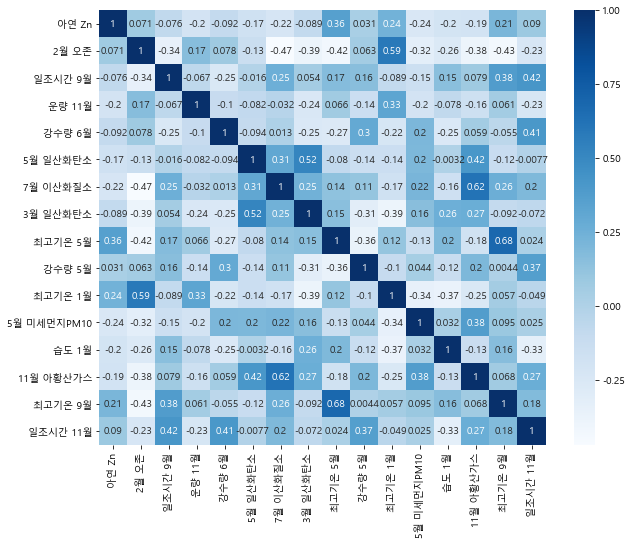

In [0]:
X_sw_corr = X_sw.corr()
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.heatmap(X_sw_corr,annot = True,  cmap="Blues") 
#correlation 수치가 높은 변수들이 없으므로 변수 모두 선택

# MODELING 

## Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_sw, 
                                                    y_sw, 
                                                    test_size=0.2, 
                                                    random_state=0)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("\ny_train",y_train.shape)
print("y_test",y_test.shape)

X_train (115, 16)
X_test (29, 16)

y_train (115,)
y_test (29,)


## 1. Linear Regression 

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
print("y_pred",y_pred.shape)
print("y_train_pred",y_train_pred.shape)

y_pred (29,)
y_train_pred (115,)


In [0]:
y_pred.reshape(1,-1)

array([[0.59358828, 0.40054795, 0.49653834, 0.61545305, 0.67030052,
        0.83202891, 0.24478165, 0.33224523, 0.86511683, 0.71453293,
        0.77134788, 0.62275507, 0.42663335, 0.65902891, 0.55524298,
        0.73176566, 0.24263908, 0.71900605, 0.54855207, 0.41169803,
        0.1489538 , 0.57671309, 0.38800868, 0.59658422, 0.53215622,
        0.77146058, 0.27169703, 0.62541239, 0.6465938 ]])

In [0]:
y_train_pred.reshape(1,-1)

array([[0.7054617 , 0.22773022, 0.49091286, 0.68770984, 0.50868076,
        0.31448515, 0.5325058 , 0.37751717, 0.64625515, 0.54223191,
        0.49505702, 0.14864126, 0.41291781, 0.31848831, 0.65298877,
        0.22222439, 0.41610941, 0.53237666, 0.48177137, 0.78331241,
        0.23263661, 0.27504286, 0.16656861, 0.64764493, 0.40981431,
        0.57071398, 0.43911924, 0.53207434, 0.26865173, 0.71155484,
        0.6533118 , 0.47350967, 0.1366493 , 0.56162819, 0.85126737,
        0.52664094, 0.56074684, 0.77184259, 0.70667869, 0.62425039,
        0.78147056, 0.49676627, 0.41106272, 0.50809453, 0.36002362,
        0.60939312, 0.42678183, 0.3963923 , 0.59198873, 0.75967305,
        0.53821188, 0.29144757, 0.46550802, 0.68252104, 0.41165063,
        0.73689507, 0.43630402, 0.75889869, 0.59686814, 0.76404307,
        0.61046468, 0.77755613, 0.64397937, 0.59443764, 0.53040168,
        0.52878168, 0.61293463, 0.40136892, 0.70201815, 0.45409278,
        0.71543191, 0.06554804, 0.23463605, 0.65

### MSE, RMSE

In [0]:
print('\nTest MAE:', mean_absolute_error(y_test, y_pred))  
print('Test MSE:',mean_squared_error(y_test, y_pred))  
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Test MAE: 0.09623600493695769
Test MSE: 0.01576514642922546
Test RMSE: 0.1255593342974765


### R-squared 

In [0]:
MAE_lr =  round(mean_absolute_error(y_test, y_pred),3)
RMSE_lr = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
R_lr = round(r2_score(y_test,y_pred),3)
print("MAE_lr:",MAE_lr)
print("RMSE_lr:",RMSE_lr)
print("R_lr:",R_lr)

MAE_lr: 0.096
RMSE_lr: 0.126
R_lr: 0.634


## 2. SVR

In [0]:
def svr_model_lr(X_train, y_train, X_test, y_test):
    
    #best parameter extraction
    gsc = GridSearchCV(
        estimator=SVR(kernel='linear'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    
    #best model
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma='auto',
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr.fit(X_train, y_train)
    y_pred = best_svr.predict(X_test)
    
    #socres 
    global R_svr_li, MAE_svr_li, RMSE_svr_li
    R_svr_li = round(best_svr.score(X_test,y_test),3)
    MAE_svr_li = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_li = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr.score(X_test,y_test),
            'MAE:',mean_absolute_error(y_test,y_pred),
            'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

### Training

In [0]:
svr_model_lr(X_train,y_train,X_test,y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.33998665227610403,
 'MAE:',
 0.1421502914878212,
 'RMSE:',
 0.1686974416584456)

### SVR kernel='rbf'

In [0]:
def svr_model_rbf(X_train, y_train, X_test, y_test):
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    best_svr_rbf = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr_rbf.fit(X_train, y_train)
    y_pred = best_svr_rbf.predict(X_test)
    
    #socres 
    global R_svr_rbf, MAE_svr_rbf, RMSE_svr_rbf
    R_svr_rbf = round(best_svr_rbf.score(X_test,y_test),3)
    MAE_svr_rbf = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_rbf = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr_rbf.score(X_test,y_test),
            'MAE:',mean_absolute_error(y_test,y_pred),
            'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

### Training

In [0]:
svr_model_rbf(X_train, y_train, X_test, y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.5978173057112228,
 'MAE:',
 0.10234102778872511,
 'RMSE:',
 0.13168727980682815)

## XGboost_Regressor

In [0]:
def xgb_reg(X_train,y_train,X_test,y_test):
    #최적의 파라미터 추출
    xgb_param_grid={
        'n_estimator' : list(range(1000,2000,100)),
        'learning_rate' : list(np.arange(0.0260,0.031, 0.0001)),
        'max_depth' : list(range(1,4,1))}
    xgb = GridSearchCV(XGBRegressor(),
                        param_grid=xgb_param_grid,
                        n_jobs=-1,
                        verbose=1,
                        scoring='r2')
    xgb_result = xgb.fit(X_train,y_train)
    best_params = xgb_result.best_params_
    
    #최적의 모델
    best_xgb = XGBRegressor(learning_rate=best_params["learning_rate"], 
                           max_depth=best_params["max_depth"], 
                           n_estimators=best_params["n_estimator"],
                           verbose=1, 
                           max_iter=10000)
    #최적의 모델로 데이터 핏팅
    best_xgb.fit(X_train, y_train)
    y_pred = best_xgb.predict(X_test)

    #점수 저장 
    global R_xgb, MAE_xgb, RMSE_xgb
    R_xgb = round(best_xgb.score(X_test,y_test),3)
    MAE_xgb = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_xgb = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
    
    return (best_xgb.score(X_test,y_test),
            mean_absolute_error(y_test,y_pred),
            np.sqrt(mean_squared_error(y_test,y_pred)))

## Training

In [0]:
xgb_reg(X_train,y_train,X_test,y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1530 candidates, totalling 4590 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1936 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 4590 out of 4590 | elapsed:   22.3s finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\sundooedu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.3787940318856552, 0.1393207596506798, 0.163662788674603)

# Result Comparing

In [0]:
print('=====Linear Regression====')
print('MAE:', MAE_lr)
print('RMSE:', RMSE_lr)
print('R-squared', R_lr)

print('====SVR kernel linear====')
print('MAE:', MAE_svr_li)
print('RMSE:', RMSE_svr_li)
print('R-squared', R_svr_li)

print('====SVR kernel rbf====')
print('MAE:', MAE_svr_rbf)
print('RMSE:', RMSE_svr_rbf)
print('R-squared', R_svr_rbf)

print('====XgBoost====')
print('MAE:', MAE_xgb)
print('RMSE:', RMSE_xgb)
print('R-squared', R_xgb)

=====Linear Regression====
MAE: 0.096
RMSE: 0.126
R-squared 0.634
====SVR kernel linear====
MAE: 0.142
RMSE: 0.169
R-squared 0.34
====SVR kernel rbf====
MAE: 0.102
RMSE: 0.132
R-squared 0.598
====XgBoost====
MAE: 0.139
RMSE: 0.164
R-squared 0.379
